In [37]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from IPython.display import Image
from pandas.plotting import scatter_matrix

import pandas as pd
import matplotlib.pyplot as plt


In [38]:
melbourne_data = pd.read_csv('./house.csv')
melbourne_data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11656,23537,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
11657,23538,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
11658,23539,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
11659,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


In [39]:
cut_labels = ['Low', 'Medium', 'High']
cut_bins = [0, 900000, 1200000, 10000000]
melbourne_data['Price_lable'] = pd.cut(melbourne_data['Price'], bins = cut_bins, labels = cut_labels)

In [40]:
melbourne_data.columns
melbourne_data.head()
y = melbourne_data.Price_lable
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
x = melbourne_data[melbourne_features]
x.describe()
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1,202,-37.7996,144.9984
1,2,1,156,-37.8079,144.9934
2,3,2,134,-37.8093,144.9944
3,3,2,94,-37.7969,144.9969
4,4,1,120,-37.8072,144.9941


In [41]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2, random_state=3)

In [42]:
decision_Tree = tree.DecisionTreeClassifier(criterion='gini')
decision_Tree.fit(x_Train, y_Train)

DecisionTreeClassifier()

In [43]:
predictions = decision_Tree.predict(x_Test)
print(accuracy_score(y_Test, predictions))
print(confusion_matrix(y_Test, predictions))
print(classification_report(y_Test, predictions))

0.723103300471496
[[667  53 125]
 [ 44 818 143]
 [135 146 202]]
              precision    recall  f1-score   support

        High       0.79      0.79      0.79       845
         Low       0.80      0.81      0.81      1005
      Medium       0.43      0.42      0.42       483

    accuracy                           0.72      2333
   macro avg       0.67      0.67      0.67      2333
weighted avg       0.72      0.72      0.72      2333



In [44]:
target = melbourne_data['Price_lable'].unique()
target

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [45]:
dot_data = tree.export_graphviz(decision_Tree, out_file=None, feature_names=melbourne_features, class_names=target)


In [46]:
import pydotplus as pdp 

graph = pdp.graph_from_dot_data(dot_data)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.282428 to fit



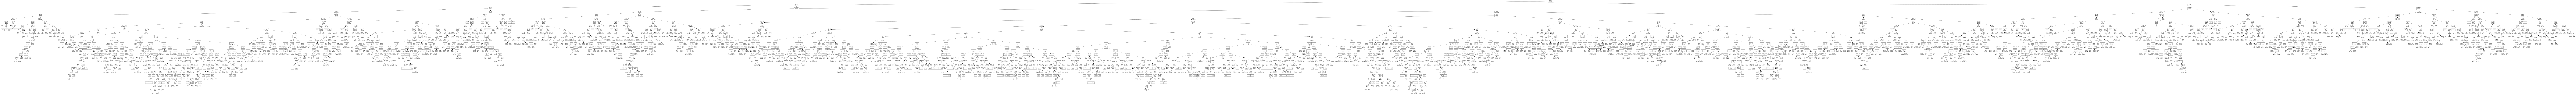

In [47]:
Image(graph.create_png())